 ### Постановка задачи

У нас есть много экспериментальных точек. Через них надо провести кривую, которая как можно ближе проходила к этим точкам.

Почему нельзя провести интерполяционный полином?

Это другая задача.

    Точки получены с некоторой погрешностью;
    интерполяционный полином будет либо очень большой степени (будет долго считаться; возникнут биения ближе к краям интервала, на котором проведена интерполяция; резкий рост за пределами интервала интерполяции)
    сплайн-интерполяция будет учитывать только несколько точек на краях, почти игнорируя другие точки (а нам хочется, чтобы все точки внесли вклад в построение кривой).
    задача построения значений вне отрезка интерполяции не решается интерполяционными полиномами.
    точки получены с ошибкой (измерения), поэтому прямо через них не обязательно проводить кривую, достаточно, чтобы она проходила через некоторую окрестность точки.
    количество уравнений, определяющих точки, больше, чем количество неизвестных. Т.е. система переопределена, точное решение невозможно.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import *
from numpy.random import *

x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

In [2]:
x

array([0, 1, 2, 3])

In [3]:
y

array([-1. ,  0.2,  0.9,  2.1])

 Перепишем линейное уравнение y = mx + c как y = Ap, где A = [[ x 1 ]] и p = [[m], [c]]

Построим А по х : 

In [4]:
A = np.vstack([x, np.ones(len(x))]).T

Используем lstsq для решения его относительно вектора p.

In [5]:
m, c = np.linalg.lstsq(A, y,rcond=-1)[0]

In [6]:
print(m, c )

0.9999999999999997 -0.9499999999999992


Построим график полученной прямой и укажем на нем точки. 

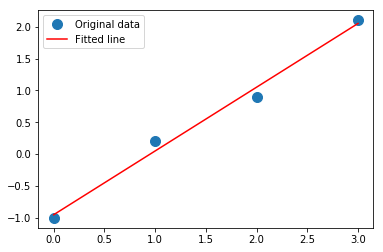

In [7]:
plt.plot(x, y, 'o', label='Original data', markersize=10)
plt.plot(x, m*x + c, 'r', label='Fitted line')
plt.legend()
plt.show()

 ### Подгонка методом наименьших квадратов в scipy (парабола)

lstsq(m,v) – приближенное решение системы линейных уравнений по методу наименьших квадратов.

Например: пусть x,y – вектора длиной n > 3 (точек > 3).

Задача: найти такие a, b, c, чтобы было y = ax2 + bx + c (аппроксимация параболой). Задача переопределена (n уравнений, 3 неизвестных) и точного решения не имеет. 

 ### Генерация файла данных (используем модуль numpy)

IDEA! Данные должны быть получены в результате измерений, но мы показываем пример, поэтому сделаем эти данные сами. Возьмем функцию и добавим случайные отклонения в координаты х и у. 

In [8]:
delta=10.0 # разброс значений
x=linspace(-20,20,21) # задаем список от -5 до 5 в количестве 11 элементов

In [9]:
y=x**2+delta*(rand(21)-0.5)

In [10]:
x+=delta*(rand(21)-0.5)#получение случайных значений x нарастающим итогом в диапазоне от 0 до 1 со смещением 0,5

In [11]:
x.tofile('x_data.txt', '\n')#запись в файл
y.tofile('y_data.txt', '\n')

In [12]:
from pylab import *
from scipy.linalg import *

# читаем данные из файлов
x=fromfile('x_data.txt',float,sep='\n')
y=fromfile('y_data.txt',float,sep='\n')


In [13]:
# задаем вектор m = [x**2, x, E]
m=vstack((x**3,x**2,x,ones(21))).T

In [14]:
m[0].T

array([-1.15505881e+04,  5.10978621e+02, -2.26048362e+01,  1.00000000e+00])

In [15]:
x

array([-22.60483624, -20.20129106, -19.23544379, -10.76931523,
       -12.12034348,  -5.33719088,  -7.91381657,  -5.63958905,
        -6.35855753,  -0.83591059,   0.57555322,   0.66407383,
         2.79138533,   9.24354785,   4.16459646,  14.01243179,
        15.85443779,  13.72652802,  19.42691598,  20.66728387,
        20.19118404])

In [16]:
# находим коэффициенты при составляющих вектора m
s=lstsq(m,y)[0]

In [17]:
s

array([ 9.14692078e-03,  7.56398593e-01, -3.55960517e+00,  1.41985778e+01])

In [18]:
lstsq?

###  Нахождение коэффициентов функции вида y = ax2 + bx + c методом наименьших квадратов 

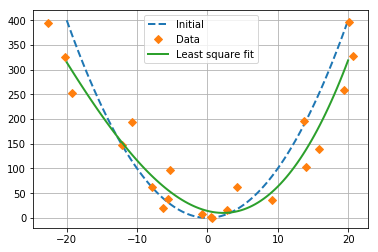

In [19]:
# на отрезке [-5,5]
x_prec=linspace(-20,20,101)
# рисуем теоретическую кривую x<sup>2</sup>
plot(x_prec,x_prec**2,'--',lw=2)
# рисуем точки
plot(x,y,'D')
# рисуем кривую вида y = ax<sup>2</sup> + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]
plot(x_prec,s[0]*x_prec**3+s[1]*x_prec**2+s[2]*x_prec+s[3],'-',lw=2)
grid()
savefig('plot4.png')
legend(('Initial','Data','Least square fit'));

###  Еще один пример для scipy (произвольная функция) 

Пусть мы проверяем гипотезу, что наши точки ложатся на кривую вида f (x,b) = b0 + b1*exp(-b2 * x***2)

###  Генерация тестовых данных

Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75, 0.5) 

In [20]:
from scipy.optimize import curve_fit
beta = (0.25, 0.75, 0.5) # задал значение коэффициентов нелинейной кривой
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2) ## определение функции
# зададим массив точек хi
xdata = np.linspace(0, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))

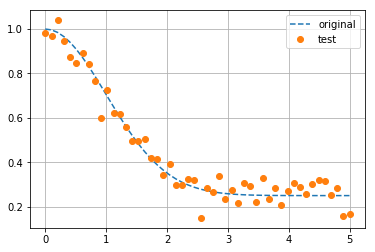

In [21]:
plot(xdata,y,"--")
grid()
plot(xdata,ydata,"o")

legend(("original","test"));


###  Решение

Используем функцию для получения решения в виде коэффициентов функции f(x) для указанных xdata и ydata 

In [22]:
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
beta_opt

array([0.26186386, 0.71729724, 0.51036882])

In [23]:
beta_cov

array([[ 1.00096809e-04, -7.31328715e-05,  1.99205795e-04],
       [-7.31328715e-05,  4.34976280e-04,  2.16420779e-04],
       [ 1.99205795e-04,  2.16420779e-04,  1.48653606e-03]])

In [24]:
size(beta_cov)

9

In [25]:
beta_cov.reshape(1,size(beta_cov))

array([[ 1.00096809e-04, -7.31328715e-05,  1.99205795e-04,
        -7.31328715e-05,  4.34976280e-04,  2.16420779e-04,
         1.99205795e-04,  2.16420779e-04,  1.48653606e-03]])

Вычислим, насколько велико линейное отклонение 

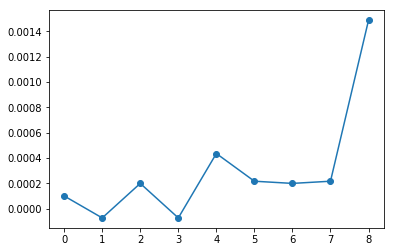

In [26]:
plot(beta_cov.reshape(size(beta_cov),1),"o-"); #величина линейного отклонения

In [27]:
lin_dev =  sum(beta_cov)
print (lin_dev)

0.002706596554073386


Вычислим, насколько велико квадратичное отклонение 

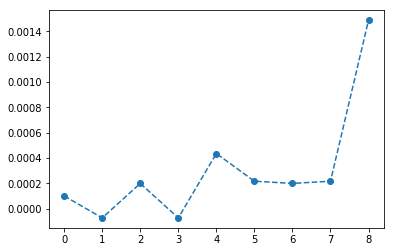

In [28]:
residuals = ydata - f(xdata,*beta_opt)
plot(beta_cov.reshape(size(beta_cov),1),"o--");

In [29]:
fres = sum(residuals**2)
print (fres)

0.11173620624499801


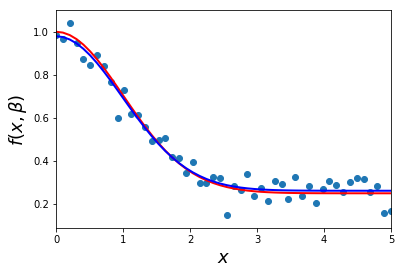

In [30]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

### С использованием Data Frame

In [31]:
import pandas as pd
import numpy as np

In [32]:
pd.set_option("display.notebook_repr_html", False)
pd.set_option("display.max_columns",20)
pd.set_option("display.max_rows",20)
pd.set_option("display.width",80)

In [33]:
#создадим целевую функцию
def f(x):
    return  1+3*cos(x**2)

In [91]:
# зададим массив точек хi в DataFrame в диапазоне -3 до 3
xdata = pd.DataFrame({x : (list(np.linspace(-3,3,200)**x)) for x in list(np.arange(100))})

In [93]:
xdata;

In [94]:
#для удобства инверсируем xdata
xdata = xdata[xdata.columns[::-1]]

In [95]:
xdata

               99            98            97            96            95  \
0   -1.717925e+47  5.726417e+46 -1.908806e+46  6.362685e+45 -2.120895e+45   
1   -6.319839e+46  2.128000e+46 -7.165347e+45  2.412697e+45 -8.123972e+44   
2   -2.301316e+46  7.828407e+45 -2.662997e+45  9.058740e+44 -3.081520e+44   
3   -8.293221e+45  2.850347e+45 -9.796530e+44  3.367028e+44 -1.157234e+44   
4   -2.957011e+45  1.026955e+45 -3.566563e+44  1.238649e+44 -4.301766e+43   
5   -1.042961e+45  3.660482e+44 -1.284719e+44  4.508980e+43 -1.582517e+43   
6   -3.638050e+44  1.290503e+44 -4.577719e+43  1.623825e+43 -5.760094e+42   
7   -1.254731e+44  4.498947e+43 -1.613136e+43  5.784037e+42 -2.073916e+42   
8   -4.277673e+43  1.550559e+43 -5.620423e+42  2.037275e+42 -7.384659e+41   
9   -1.441214e+43  5.281798e+42 -1.935687e+42  7.093953e+41 -2.599810e+41   
..            ...           ...           ...           ...           ...   
190  1.441214e+43  5.281798e+42  1.935687e+42  7.093953e+41  2.599810e+41   

In [96]:
# создаем теоретически правильные значения точек yi (без шума)
ydata = f(np.linspace(-3,3,200))

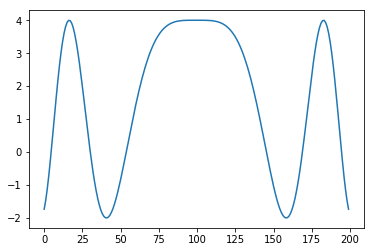

In [97]:
plot(ydata);

In [98]:
# зашумляем данные
ydata1 = ydata +1* np.random.randn(len(xdata))

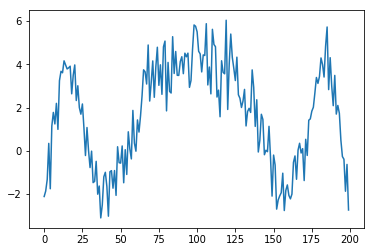

In [99]:
plot(ydata1);

In [111]:
X = xdata.loc[:,1:0]

In [112]:
list(X.columns)

[1, 0]

In [113]:
s=lstsq(X,ydata1)[0]

In [114]:
# функция последовательного сложения столбцов произведения s и X
def sum_data(s,X):
    w=list(X.columns)
    k=int(w[0])
    y_prec1=(s*X).loc[:,k]
    while k >0:
        k=k-1
        y_prec1 = y_prec1+(s*X).loc[:,k]     
    return y_prec1

In [123]:
sum_data(s,X);

In [124]:
X;

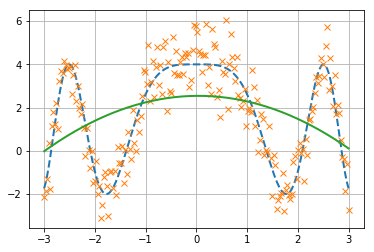

In [125]:
# на отрезке [-3,3]
x_prec1=linspace(-3,3,200)
# рисуем теоретическую кривую x<sup>2</sup>
plot(xdata.loc[:,1],ydata,'--',lw=2)
# рисуем точки
plot(xdata.loc[:,1],ydata1,'x',lw=1)
# рисуем кривую вида y = ax<sup>2</sup> + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]
#plot(x_prec1,s[0]*x_prec1+s[1],'-',lw=2)
plot(x_prec1,sum_data(s,X),'-',lw=2)
grid()
savefig('plot1.png')





In [126]:
X = xdata.loc[:,2:0]

In [127]:
X

            2         1    0
0    9.000000 -3.000000  1.0
1    8.820005 -2.969849  1.0
2    8.641827 -2.939698  1.0
3    8.465468 -2.909548  1.0
4    8.290927 -2.879397  1.0
5    8.118204 -2.849246  1.0
6    7.947299 -2.819095  1.0
7    7.778213 -2.788945  1.0
8    7.610944 -2.758794  1.0
9    7.445494 -2.728643  1.0
..        ...       ...  ...
190  7.445494  2.728643  1.0
191  7.610944  2.758794  1.0
192  7.778213  2.788945  1.0
193  7.947299  2.819095  1.0
194  8.118204  2.849246  1.0
195  8.290927  2.879397  1.0
196  8.465468  2.909548  1.0
197  8.641827  2.939698  1.0
198  8.820005  2.969849  1.0
199  9.000000  3.000000  1.0

[200 rows x 3 columns]

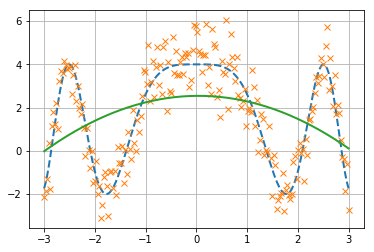

In [170]:
X = xdata.loc[:,2:0]
s=lstsq(X,ydata1)[0]
# на отрезке [-3,3]
x_prec1=linspace(-3,3,200)
# рисуем теоретическую кривую x<sup>2</sup>
plot(xdata.loc[:,1],ydata,'--',lw=2)
# рисуем точки
plot(xdata.loc[:,1],ydata1,'x',lw=1)
# рисуем кривую вида y = ax<sup>2</sup> + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]

plot(x_prec1,sum_data(s,X),'-',lw=2)
grid()
savefig('plot2.png')

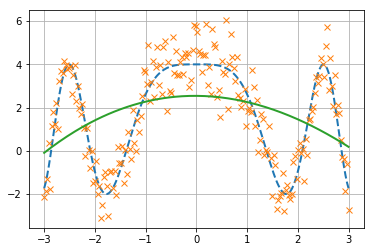

In [172]:
X = xdata.loc[:,3:0]
s=lstsq(X,ydata1)[0]
# на отрезке [-3,3]
x_prec1=linspace(-3,3,200)
# рисуем теоретическую кривую x<sup>2</sup>
plot(xdata.loc[:,1],ydata,'--',lw=2)
# рисуем точки
plot(xdata.loc[:,1],ydata1,'x',lw=1)
# рисуем кривую вида y = ax<sup>2</sup> + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]

plot(x_prec1,sum_data(s,X),'-',lw=2)
grid()
savefig('plot3.png')

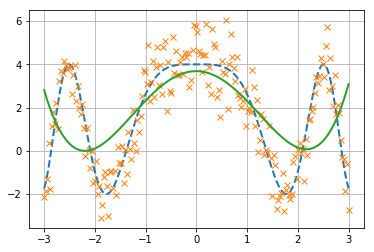

In [131]:
X = xdata.loc[:,4:0]
s=lstsq(X,ydata1)[0]
# на отрезке [-3,3]
x_prec1=linspace(-3,3,200)
# рисуем теоретическую кривую x<sup>2</sup>
plot(xdata.loc[:,1],ydata,'--',lw=2)
# рисуем точки
plot(xdata.loc[:,1],ydata1,'x',lw=1)
# рисуем кривую вида y = ax<sup>2</sup> + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]

plot(x_prec1,sum_data(s,X),'-',lw=2)
grid()
savefig('plot4.png')

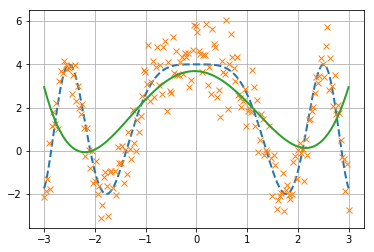

In [132]:
X = xdata.loc[:,5:0]
s=lstsq(X,ydata1)[0]
# на отрезке [-3,3]
x_prec1=linspace(-3,3,200)
# рисуем теоретическую кривую x<sup>2</sup>
plot(xdata.loc[:,1],ydata,'--',lw=2)
# рисуем точки
plot(xdata.loc[:,1],ydata1,'x',lw=1)
# рисуем кривую вида y = ax<sup>2</sup> + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]

plot(x_prec1,sum_data(s,X),'-',lw=2)
grid()
savefig('plot5.png')

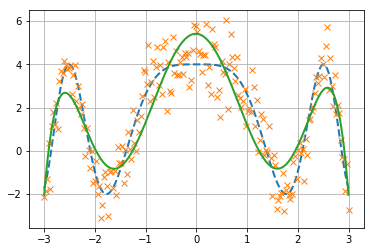

In [133]:
X = xdata.loc[:,6:0]
s=lstsq(X,ydata1)[0]
# на отрезке [-3,3]
x_prec1=linspace(-3,3,200)
# рисуем теоретическую кривую x<sup>2</sup>
plot(xdata.loc[:,1],ydata,'--',lw=2)
# рисуем точки
plot(xdata.loc[:,1],ydata1,'x',lw=1)
# рисуем кривую вида y = ax<sup>2</sup> + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]
plot(x_prec1,sum_data(s,X),'-',lw=2)
grid()
savefig('plot6.png')

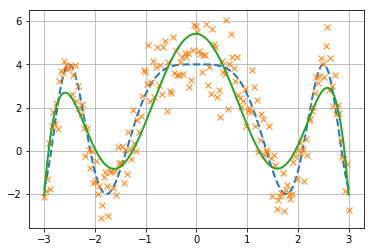

In [134]:
X = xdata.loc[:,7:0]
s=lstsq(X,ydata1)[0]
# на отрезке [-3,3]
x_prec1=linspace(-3,3,200)
# рисуем теоретическую кривую x<sup>2</sup>
plot(xdata.loc[:,1],ydata,'--',lw=2)
# рисуем точки
plot(xdata.loc[:,1],ydata1,'x',lw=1)
# рисуем кривую вида y = ax<sup>2</sup> + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]
plot(x_prec1,sum_data(s,X),'-',lw=2)
grid()
savefig('plot7.png')

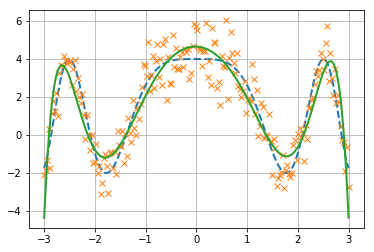

In [135]:
X = xdata.loc[:,8:0]
s=lstsq(X,ydata1)[0]
# на отрезке [-3,3]
x_prec1=linspace(-3,3,200)
# рисуем теоретическую кривую x<sup>2</sup>
plot(xdata.loc[:,1],ydata,'--',lw=2)
# рисуем точки
plot(xdata.loc[:,1],ydata1,'x',lw=1)
# рисуем кривую вида y = ax<sup>2</sup> + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]
plot(x_prec1,sum_data(s,X),'-',lw=2)
grid()
savefig('plot8.png')

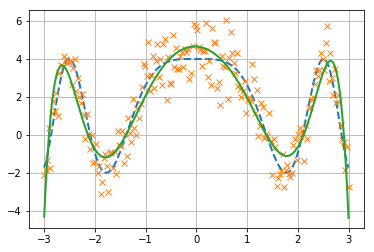

In [136]:
X = xdata.loc[:,9:0]
s=lstsq(X,ydata1)[0]
# на отрезке [-3,3]
x_prec1=linspace(-3,3,200)
# рисуем теоретическую кривую x<sup>2</sup>
plot(xdata.loc[:,1],ydata,'--',lw=2)
# рисуем точки
plot(xdata.loc[:,1],ydata1,'x',lw=1)
# рисуем кривую вида y = ax<sup>2</sup> + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]
plot(x_prec1,sum_data(s,X),'-',lw=2)
grid()
savefig('plot9.png')

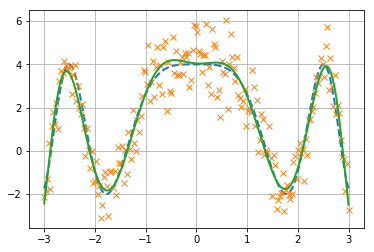

In [137]:
X = xdata.loc[:,10:0]
s=lstsq(X,ydata1)[0]
# на отрезке [-3,3]
x_prec1=linspace(-3,3,200)
# рисуем теоретическую кривую x<sup>2</sup>
plot(xdata.loc[:,1],ydata,'--',lw=2)
# рисуем точки
plot(xdata.loc[:,1],ydata1,'x',lw=1)
# рисуем кривую вида y = ax<sup>2</sup> + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]
plot(x_prec1,sum_data(s,X),'-',lw=2)
grid()
savefig('plot10.png')

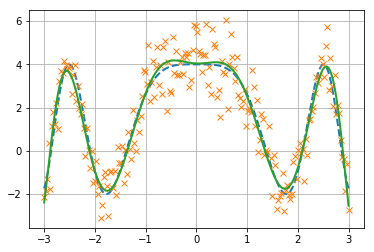

In [138]:
X = xdata.loc[:,11:0]
s=lstsq(X,ydata1)[0]
# на отрезке [-3,3]
x_prec1=linspace(-3,3,200)
# рисуем теоретическую кривую x<sup>2</sup>
plot(xdata.loc[:,1],ydata,'--',lw=2)
# рисуем точки
plot(xdata.loc[:,1],ydata1,'x',lw=1)
# рисуем кривую вида y = ax<sup>2</sup> + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]
plot(x_prec1,sum_data(s,X),'-',lw=2)
grid()
savefig('plot11.png')

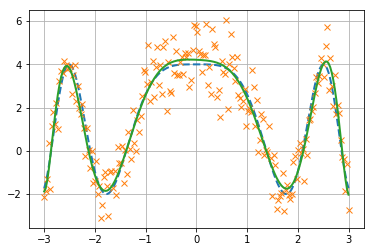

In [140]:
X = xdata.loc[:,12:0]
s=lstsq(X,ydata1)[0]
# на отрезке [-3,3]
x_prec1=linspace(-3,3,200)
# рисуем теоретическую кривую x<sup>2</sup>
plot(xdata.loc[:,1],ydata,'--',lw=2)
# рисуем точки
plot(xdata.loc[:,1],ydata1,'x',lw=1)
# рисуем кривую вида y = ax<sup>2</sup> + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]
plot(x_prec1,sum_data(s,X),'-',lw=2)
grid()
savefig('plot12.png')

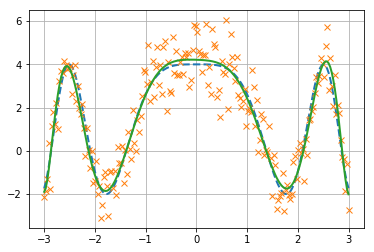

In [141]:
X = xdata.loc[:,13:0]
s=lstsq(X,ydata1)[0]
# на отрезке [-3,3]
x_prec1=linspace(-3,3,200)
# рисуем теоретическую кривую x<sup>2</sup>
plot(xdata.loc[:,1],ydata,'--',lw=2)
# рисуем точки
plot(xdata.loc[:,1],ydata1,'x',lw=1)
# рисуем кривую вида y = ax<sup>2</sup> + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]
plot(x_prec1,sum_data(s,X),'-',lw=2)
grid()
savefig('plot13.png')

In [ ]:
X = xdata.loc[:,14:0]
s=lstsq(X,ydata1)[0]
# на отрезке [-3,3]
x_prec1=linspace(-3,3,200)
# рисуем теоретическую кривую x<sup>2</sup>
plot(xdata.loc[:,1],ydata,'--',lw=2)
# рисуем точки
plot(xdata.loc[:,1],ydata1,'x',lw=1)
# рисуем кривую вида y = ax<sup>2</sup> + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]
plot(x_prec1,sum_data(s,X),'-',lw=2)
grid()
savefig('plot14.png')

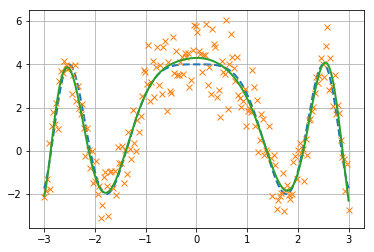

In [142]:
X = xdata.loc[:,15:0]
s=lstsq(X,ydata1)[0]
# на отрезке [-3,3]
x_prec1=linspace(-3,3,200)
# рисуем теоретическую кривую x<sup>2</sup>
plot(xdata.loc[:,1],ydata,'--',lw=2)
# рисуем точки
plot(xdata.loc[:,1],ydata1,'x',lw=1)
# рисуем кривую вида y = ax<sup>2</sup> + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]
plot(x_prec1,sum_data(s,X),'-',lw=2)
grid()
savefig('plot15.png')

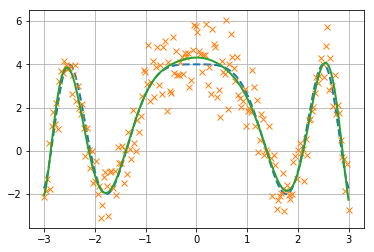

In [143]:
X = xdata.loc[:,16:0]
s=lstsq(X,ydata1)[0]
# на отрезке [-3,3]
x_prec1=linspace(-3,3,200)
# рисуем теоретическую кривую x<sup>2</sup>
plot(xdata.loc[:,1],ydata,'--',lw=2)
# рисуем точки
plot(xdata.loc[:,1],ydata1,'x',lw=1)
# рисуем кривую вида y = ax<sup>2</sup> + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]
plot(x_prec1,sum_data(s,X),'-',lw=2)
grid()
savefig('plot16.png')

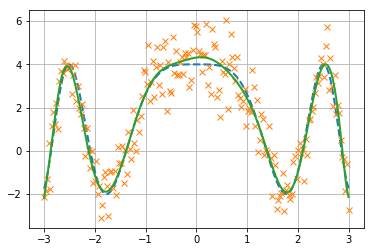

In [145]:
X = xdata.loc[:,17:0]
s=lstsq(X,ydata1)[0]
# на отрезке [-3,3]
x_prec1=linspace(-3,3,200)
# рисуем теоретическую кривую x<sup>2</sup>
plot(xdata.loc[:,1],ydata,'--',lw=2)
# рисуем точки
plot(xdata.loc[:,1],ydata1,'x',lw=1)
# рисуем кривую вида y = ax<sup>2</sup> + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]
plot(x_prec1,sum_data(s,X),'-',lw=2)
grid()
savefig('plot17.png')

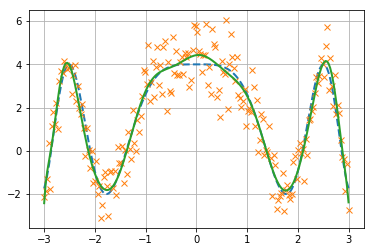

In [146]:
X = xdata.loc[:,18:0]
s=lstsq(X,ydata1)[0]
# на отрезке [-3,3]
x_prec1=linspace(-3,3,200)
# рисуем теоретическую кривую x<sup>2</sup>
plot(xdata.loc[:,1],ydata,'--',lw=2)
# рисуем точки
plot(xdata.loc[:,1],ydata1,'x',lw=1)
# рисуем кривую вида y = ax<sup>2</sup> + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]
plot(x_prec1,sum_data(s,X),'-',lw=2)
grid()
savefig('plot18.png')

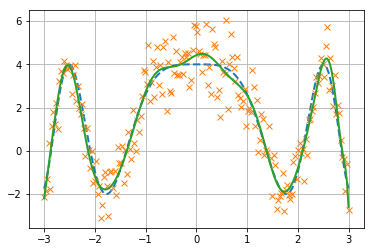

In [147]:
X = xdata.loc[:,19:0]
s=lstsq(X,ydata1)[0]
# на отрезке [-3,3]
x_prec1=linspace(-3,3,200)
# рисуем теоретическую кривую x<sup>2</sup>
plot(xdata.loc[:,1],ydata,'--',lw=2)
# рисуем точки
plot(xdata.loc[:,1],ydata1,'x',lw=1)
# рисуем кривую вида y = ax<sup>2</sup> + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]
plot(x_prec1,sum_data(s,X),'-',lw=2)
grid()
savefig('plot19.png')

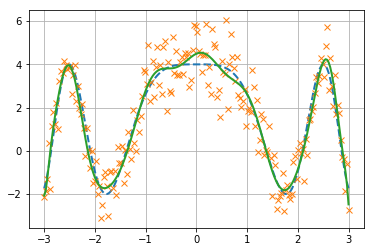

In [148]:
X = xdata.loc[:,20:0]
s=lstsq(X,ydata1)[0]
# на отрезке [-3,3]
x_prec1=linspace(-3,3,200)
# рисуем теоретическую кривую x<sup>2</sup>
plot(xdata.loc[:,1],ydata,'--',lw=2)
# рисуем точки
plot(xdata.loc[:,1],ydata1,'x',lw=1)
# рисуем кривую вида y = ax<sup>2</sup> + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]
plot(x_prec1,sum_data(s,X),'-',lw=2)
grid()
savefig('plot20.png')

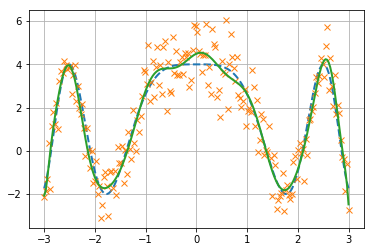

In [149]:
X = xdata.loc[:,21:0]
s=lstsq(X,ydata1)[0]
# на отрезке [-3,3]
x_prec1=linspace(-3,3,200)
# рисуем теоретическую кривую x<sup>2</sup>
plot(xdata.loc[:,1],ydata,'--',lw=2)
# рисуем точки
plot(xdata.loc[:,1],ydata1,'x',lw=1)
# рисуем кривую вида y = ax<sup>2</sup> + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]
plot(x_prec1,sum_data(s,X),'-',lw=2)
grid()
savefig('plot21.png')

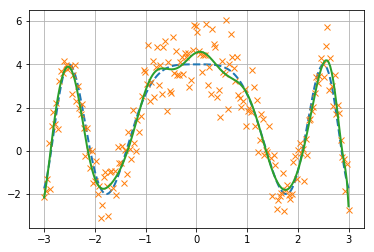

In [152]:
X = xdata.loc[:,22:0]
s=lstsq(X,ydata1)[0]
# на отрезке [-3,3]
x_prec1=linspace(-3,3,200)
# рисуем теоретическую кривую x<sup>2</sup>
plot(xdata.loc[:,1],ydata,'--',lw=2)
# рисуем точки
plot(xdata.loc[:,1],ydata1,'x',lw=1)
# рисуем кривую вида y = ax<sup>2</sup> + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]
plot(x_prec1,sum_data(s,X),'-',lw=2)
grid()
savefig('plot22.png')

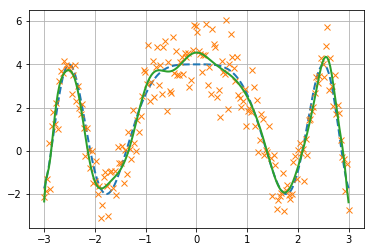

In [153]:
X = xdata.loc[:,23:0]
s=lstsq(X,ydata1)[0]
# на отрезке [-3,3]
x_prec1=linspace(-3,3,200)
# рисуем теоретическую кривую x<sup>2</sup>
plot(xdata.loc[:,1],ydata,'--',lw=2)
# рисуем точки
plot(xdata.loc[:,1],ydata1,'x',lw=1)
# рисуем кривую вида y = ax<sup>2</sup> + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]
plot(x_prec1,sum_data(s,X),'-',lw=2)
grid()
savefig('plot23.png')

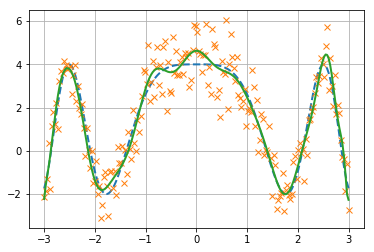

In [155]:
X = xdata.loc[:,24:0]
s=lstsq(X,ydata1)[0]
# на отрезке [-3,3]
x_prec1=linspace(-3,3,200)
# рисуем теоретическую кривую x<sup>2</sup>
plot(xdata.loc[:,1],ydata,'--',lw=2)
# рисуем точки
plot(xdata.loc[:,1],ydata1,'x',lw=1)
# рисуем кривую вида y = ax<sup>2</sup> + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]
plot(x_prec1,sum_data(s,X),'-',lw=2)
grid()
savefig('plot24.png')

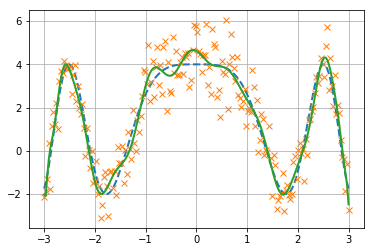

In [156]:
X = xdata.loc[:,25:0]
s=lstsq(X,ydata1)[0]
# на отрезке [-3,3]
x_prec1=linspace(-3,3,200)
# рисуем теоретическую кривую x<sup>2</sup>
plot(xdata.loc[:,1],ydata,'--',lw=2)
# рисуем точки
plot(xdata.loc[:,1],ydata1,'x',lw=1)
# рисуем кривую вида y = ax<sup>2</sup> + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]
plot(x_prec1,sum_data(s,X),'-',lw=2)
grid()
savefig('plot25.png')

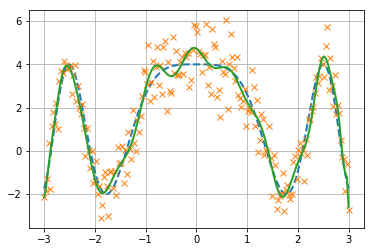

In [158]:
X = xdata.loc[:,26:0]
s=lstsq(X,ydata1)[0]
# на отрезке [-3,3]
x_prec1=linspace(-3,3,200)
# рисуем теоретическую кривую x<sup>2</sup>
plot(xdata.loc[:,1],ydata,'--',lw=2)
# рисуем точки
plot(xdata.loc[:,1],ydata1,'x',lw=1)
# рисуем кривую вида y = ax<sup>2</sup> + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]
plot(x_prec1,sum_data(s,X),'-',lw=2)
grid()
savefig('plot26.png')

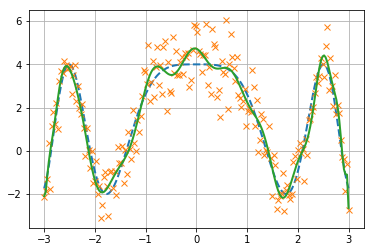

In [159]:
X = xdata.loc[:,27:0]
s=lstsq(X,ydata1)[0]
# на отрезке [-3,3]
x_prec1=linspace(-3,3,200)
# рисуем теоретическую кривую x<sup>2</sup>
plot(xdata.loc[:,1],ydata,'--',lw=2)
# рисуем точки
plot(xdata.loc[:,1],ydata1,'x',lw=1)
# рисуем кривую вида y = ax<sup>2</sup> + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]
plot(x_prec1,sum_data(s,X),'-',lw=2)
grid()
savefig('plot27.png')

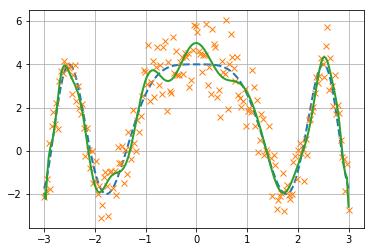

In [161]:
X = xdata.loc[:,28:0]
s=lstsq(X,ydata1)[0]
# на отрезке [-3,3]
x_prec1=linspace(-3,3,200)
# рисуем теоретическую кривую x<sup>2</sup>
plot(xdata.loc[:,1],ydata,'--',lw=2)
# рисуем точки
plot(xdata.loc[:,1],ydata1,'x',lw=1)
# рисуем кривую вида y = ax<sup>2</sup> + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]
plot(x_prec1,sum_data(s,X),'-',lw=2)
grid()
savefig('plot28.png')

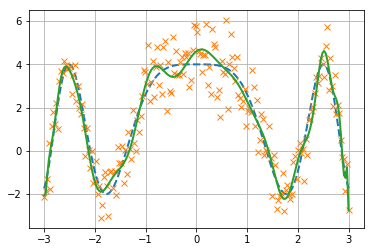

In [164]:
X = xdata.loc[:,29:0]
s=lstsq(X,ydata1)[0]
# на отрезке [-3,3]
x_prec1=linspace(-3,3,200)
# рисуем теоретическую кривую x<sup>2</sup>
plot(xdata.loc[:,1],ydata,'--',lw=2)
# рисуем точки
plot(xdata.loc[:,1],ydata1,'x',lw=1)
# рисуем кривую вида y = ax<sup>2</sup> + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]
plot(x_prec1,sum_data(s,X),'-',lw=2)
grid()
savefig('plot29.png')

In [165]:
sum(ydata-sum_data(s,X))**2

11.144250225314375

In [166]:
# функция суммы квадратов отклонений
def res_ost(X,ydata,ydata1):
    l=0
    res=[i for i in range(99)]
    while l<99:
        X = xdata.loc[:,str(l):"0"]
        s=lstsq(X,ydata1)[0]
        c=(sum(ydata-sum_data(s,X))**2)/200
        res[l]=c
        l=l+1
    return res
        
            

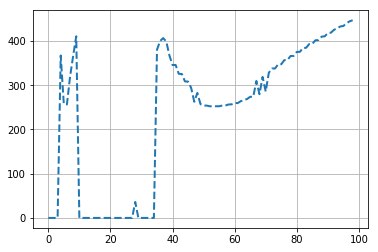

In [167]:
plot(range(99),res_ost(X,ydata,ydata1),'--',lw=2);
grid()

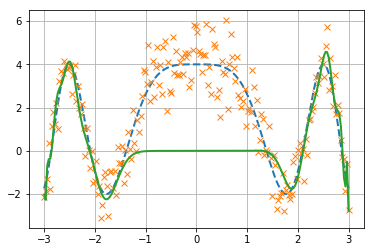

In [168]:
X = xdata.loc[:,38:0]
s=lstsq(X,ydata1)[0]
# на отрезке [-3,3]
x_prec1=linspace(-3,3,200)
# рисуем теоретическую кривую x<sup>2</sup>
plot(xdata.loc[:,1],ydata,'--',lw=2)
# рисуем точки
plot(xdata.loc[:,1],ydata1,'x',lw=1)
# рисуем кривую вида y = ax<sup>2</sup> + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]
plot(x_prec1,sum_data(s,X),'-',lw=2)
grid()
savefig('plot38.png')